In [1]:
%display latex

In [2]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


In [3]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In [17]:
# a = 2
# r = function('r')(t)
# desolve(diff(r,t) == ((a-1)*r-t)/((a+1)*r+t), r, ics=(1,1))

t*e^(-1/9*sqrt(3)*pi - 1/2*log(4)) == e^(-1/3*sqrt(3)*arctan(sqrt(3)*r(t)/t) - 1/2*log((t^2 + 3*r(t)^2)/t^2))

In [7]:
m = function('m')
g = M.lorentzian_metric('g')
g[0,0] = -(1-2*m(t+r)/r)
g[0,1] = 2*m(t+r)/r
g[1,1] = 1+2*m(t+r)/r
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = -(r - 2*m(r + t))/r dt*dt + 2*m(r + t)/r dt*dr + 2*m(r + t)/r dr*dt + (r + 2*m(r + t))/r dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [11]:
nice_derivatives(False)

In [28]:
Ric = g.ricci()

In [12]:
Ric.display()

Ric(g) = 2*D[0](m)(r + t)/r^2 dt*dt + 2*D[0](m)(r + t)/r^2 dt*dr + 2*D[0](m)(r + t)/r^2 dr*dt + 2*D[0](m)(r + t)/r^2 dr*dr

In [13]:
g.ricci_scalar().display()

r(g): M --> R
   (t, r, th, ph) |--> 0

In [14]:
T = 1/(8*pi)*Ric
T.display()

1/4*D[0](m)(r + t)/(pi*r^2) dt*dt + 1/4*D[0](m)(r + t)/(pi*r^2) dt*dr + 1/4*D[0](m)(r + t)/(pi*r^2) dr*dt + 1/4*D[0](m)(r + t)/(pi*r^2) dr*dr

In [15]:
dv = M.one_form(name='dv')
dv[:] = [1,1,0,0]
dv.display()

dv = dt + dr

In [23]:
v = var('v')
mp(v) = diff(m(v),v)
mp(v)

D[0](m)(v)

In [31]:
Ric == 2*mp(t+r)/r^2 * dv*dv

True

In [32]:
ks = -dv.up(g)
print(ks)
ks.display()

Vector field on the 4-dimensional differentiable manifold M


d/dt - d/dr

In [34]:
g(ks,ks).display()

M --> R
(t, r, th, ph) |--> 0

In [35]:
l = M.vector_field(name='l', latex_name=r'\ell')
l[0] = 1
l[1] = (r - 2*m(t+r))/(r+2*m(t+r))
l.display()

l = d/dt + (r - 2*m(r + t))/(r + 2*m(r + t)) d/dr

In [36]:
g(l,l)

Scalar field g(l,l) on the 4-dimensional differentiable manifold M

In [38]:
nab = g.connection()
acc = nab(l).contract(l)
acc.display()

-4*(r*D[0](m)(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2) d/dt + 4*(r*m(r + t) - 2*m(r + t)^2 - (r^2 - 2*r*m(r + t))*D[0](m)(r + t))/(r^3 + 6*r^2*m(r + t) + 12*r*m(r + t)^2 + 8*m(r + t)^3) d/dr

In [39]:
acc[0]/l[0]

-4*(r*D[0](m)(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [40]:
acc[1]/l[1]

-4*(r*D[0](m)(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [41]:
acc[0]/l[0] == acc[1]/l[1]

True

In [45]:
drdt = (l[1] / l[0]).expr()
drdt

(r - 2*m(r + t))/(r + 2*m(r + t))

In [119]:
v0 = var('v0')
m0 = var('m0')
h(v) = (1+sgn(v))/2
# m1(v) = m0* (heaviside(v)*heaviside(v0-v)*v/v0 + heaviside(v-v0)) 
m1(v) = m0* (h(v)*h(v0-v)*v/v0 + h(v-v0)) 
m1(v)

1/4*(v*(sgn(v) + 1)*(sgn(-v + v0) + 1)/v0 + 2*sgn(v - v0) + 2)*m0

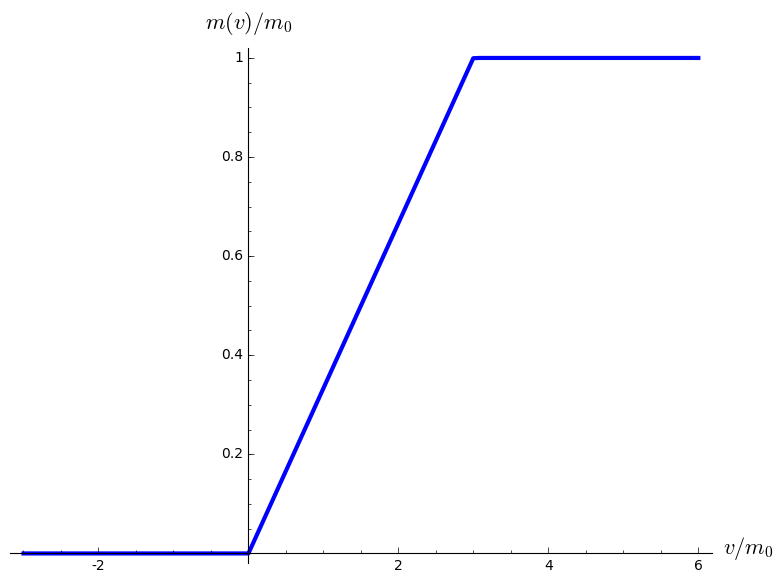

In [120]:
plot(m1(v).subs({m0: 1, v0: 3}), (v,-3, 6), thickness=3,
                axes_labels=[r'$v/m_0$', r'$m(v)/m_0$'])

In [121]:
drdt1 = drdt.substitute_function(m, m1)
drdt1

-(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 - 2*r)/(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 + 2*r)

In [122]:
drdt0 = drdt1.subs({m0: 1, v0: 3})
drdt0

-((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) - 6*r + 6*sgn(r + t - 3) + 6)/((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) + 6*r + 6*sgn(r + t - 3) + 6)

In [282]:
outgeods = []
tmax = 4
for t0 in [-6, -5, -4, -3, -2.8, -2.5, -2, -1.5, -1]:
    sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0,0.01], end_points=[t0, tmax], step=0.02)
    outgeods.append(line([[s[1],s[0]] for s in sol if s[1]>0], color='green'))

In [283]:
graph = Graphics()
rmax = 6
nl = 20
for i in range(nl+1):
    t0 = float(i)/float(nl)*3
    graph += line([(0,t0), (rmax, t0-rmax)], color='yellow')

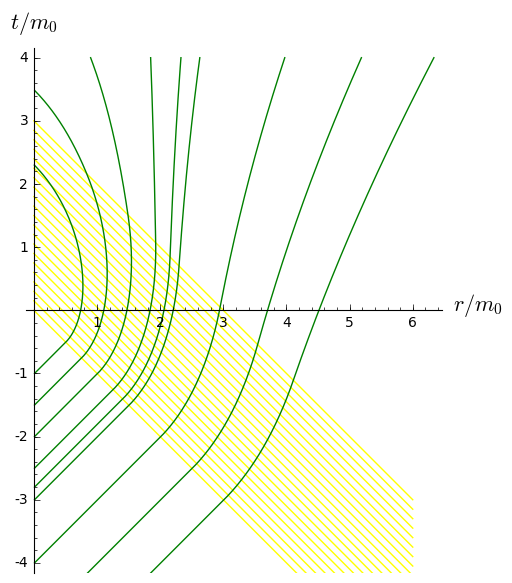

In [284]:
for geod in outgeods:
    graph += geod
show(graph, aspect_ratio=1, ymin=-4, axes_labels=[r'$r/m_0$', r'$t/m_0$'])

In [285]:
t0 = -2.6
sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0,0.01], end_points=[t0, tmax], step=0.02)
hor = line([[s[1],s[0]] for s in sol if s[1]>0], color='black', thickness=3)
graph += hor

In [286]:
ingeods = []
rmax = 6
for t0 in range(-6, 10):
    ingeods.append(line([(0,t0), (rmax, t0-rmax)], color='green'))
for geod in ingeods:
    graph += geod

In [287]:
trap = line([(0,0), (2,1), (2,tmax)], color='red', thickness=2)
graph += trap

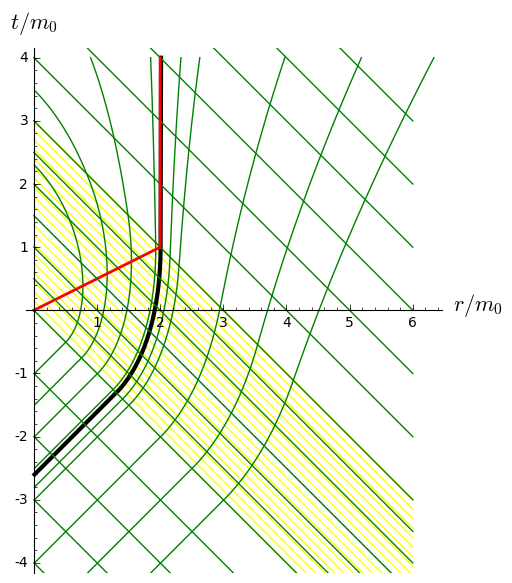

In [288]:
for t0 in [0.5, 1.5, 2.5]:
    graph += line([(0,t0), (rmax, t0-rmax)], color='green')
show(graph, aspect_ratio=1, ymin=-4, ymax=4, axes_labels=[r'$r/m_0$', r'$t/m_0$'])

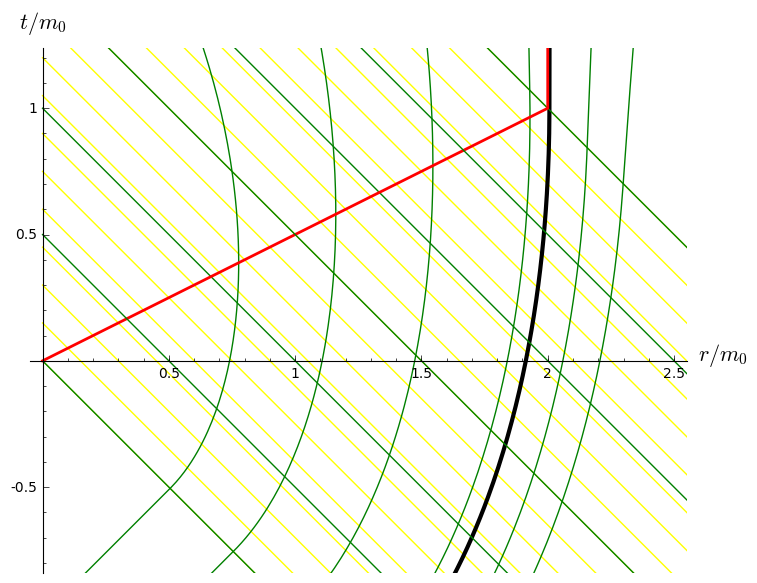

In [289]:
show(graph, aspect_ratio=1, ymin=-0.8, ymax=1.2, xmax=2.5, axes_labels=[r'$r/m_0$', r'$t/m_0$'])